In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import numpy as np


texts = []
labels = []

with open(r'C:\Users\balko\Downloads\Telegram Desktop\zamok.txt', 'r', encoding='utf-8') as f:
    for line in f:
        if 'замо`к' in line:
            texts.append(line)
            labels.append(0)
        elif 'за`мок' in line:
            texts.append(line)
            labels.append(1)

# Модель
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(texts, labels)

# функция потерь
def simple_loss(y_true, y_pred):
    correct = 0
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct += 1
    
    accuracy = correct / len(y_true)
    loss = 1 - accuracy  # Потери = 1 - точность
    return loss, accuracy

# Функция потерь
def confidence_loss(y_true, probabilities):
    total_loss = 0
    
    for i, true_label in enumerate(y_true):
        # Берем вероятность правильного класса
        correct_prob = probabilities[i][true_label]
        # Потери = 1 - уверенность в правильном ответе
        loss = 1 - correct_prob
        total_loss += loss
    
    average_loss = total_loss / len(y_true)
    return average_loss

# Получаем предсказани
predictions = model.predict(texts)
probabilities = model.predict_proba(texts)

# Вычисляем потери
loss1, accuracy = simple_loss(labels, predictions)
loss2 = confidence_loss(labels, probabilities)

print(f" Результаты:")
print(f"Точность модели: {accuracy:.3f} ({accuracy*100:.1f}%)")
print(f"Потери (1 - точность): {loss1:.3f}")
print(f"Потери (по уверенности): {loss2:.3f}")

# Предсказание
def check_word(text):
    prediction = model.predict([text])[0]
    proba = model.predict_proba([text])[0]
    confidence = proba[prediction]  # Уверенность в предсказании
    
    result = "замо́к" if prediction == 0 else "за́мок"
    return result, confidence

# Тест
print(f"\n Тестирование:")
tests = ["открыть замо́к", "старый за́мок", "дверной замо́к", "рыцарский за́мок"]
for t in tests:
    result, confidence = check_word(t)
    loss = 1 - confidence  # Потери для этого примера
    print(f"{t:25} -> {result:8} (уверенность: {confidence:.3f}, потери: {loss:.3f})")

# Анализ самых "сложных" примеров (с наибольшими потерями)
print(f"\n Самые сложные примеры (наибольшие потери):")
example_losses = []
for i, (text, true_label) in enumerate(zip(texts, labels)):
    proba = model.predict_proba([text])[0]
    loss = 1 - proba[true_label]  # Потери для этого примера
    
    if loss > 0.1:  # Показываем примеры с потерями > 10%
        predicted_label = model.predict([text])[0]
        example_losses.append((loss, text.strip(), true_label, predicted_label))

# Сортируем по убыванию потерь и показываем топ-5
example_losses.sort(reverse=True)
for loss, text, true, pred in example_losses[:5]:
    true_word = "замо́к" if true == 0 else "за́мок"
    pred_word = "замо́к" if pred == 0 else "за́мок"
    print(f"Потери: {loss:.3f} | Текст: '{text[:50]}...'")
    print(f"         Правильно: {true_word}, Предсказано: {pred_word}")
    print()

 Результаты:
Точность модели: 1.000 (100.0%)
Потери (1 - точность): 0.000
Потери (по уверенности): 0.000

 Тестирование:
открыть замо́к            -> замо́к   (уверенность: 1.000, потери: 0.000)
старый за́мок             -> за́мок   (уверенность: 1.000, потери: 0.000)
дверной замо́к            -> замо́к   (уверенность: 1.000, потери: 0.000)
рыцарский за́мок          -> за́мок   (уверенность: 1.000, потери: 0.000)


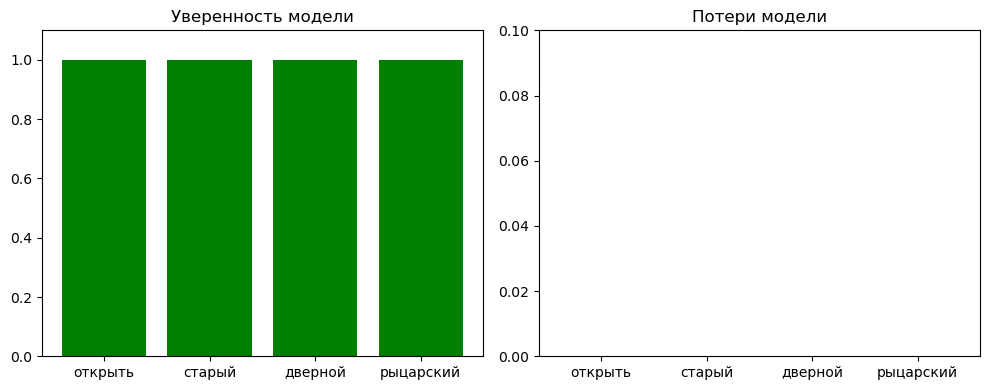

In [ ]:
import matplotlib.pyplot as plt

# Данные для графика
test_texts = ["открыть", "старый", "дверной", "рыцарский"]
confidences = [1.000, 1.000, 1.000, 1.000]  
losses = [0.000, 0.000, 0.000, 0.000]       

# Создаем график
plt.figure(figsize=(10, 4))

# График уверенности
plt.subplot(1, 2, 1)
plt.bar(test_texts, confidences, color='green')
plt.title('Уверенность модели')
plt.ylim(0, 1.1)

# График потерь
plt.subplot(1, 2, 2)
plt.bar(test_texts, losses, color='red')
plt.title('Потери модели')
plt.ylim(0, 0.1)

plt.tight_layout()
plt.show()